<a href="https://colab.research.google.com/github/nezuk00/homework1/blob/main/game%20teory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n = 37
Верхняя строка (1..n): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]
Нижняя строка (квадраты mod n): [ 1  4  9 16 25 36 12 27  7 26 10 33 21 11  3 34 30 28 28 30 34  3 11 21
 33 10 26  7 27 12 36 25 16  9  4  1  0]
Плюсов (значений i, которые встречаются как остаток квадрата): 19 / 37 (51.351%)
Минусов: 18 / 37


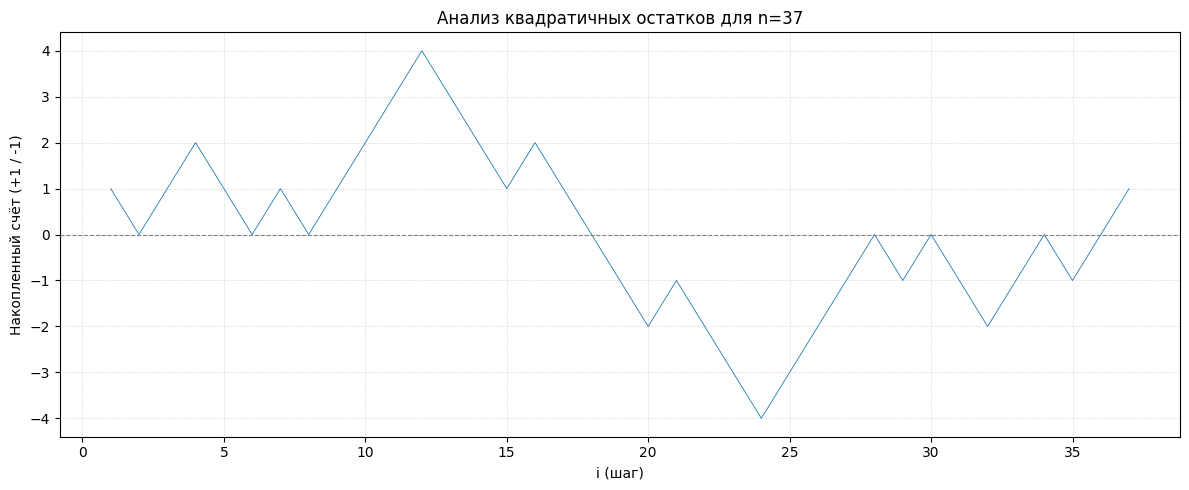

In [16]:
# Скрипт: квадраты по модулю n, проверка вхождения и визуализация
import numpy as np
import matplotlib.pyplot as plt

def analyze_quadratic_residues(n, max_preview=20, max_plot_points=500000):
    """
    Для n:
    - верхняя строка: 1..n
    - нижняя строка: s_i = (i*i) % n
    - для каждого i ставим +1 если i in {s_j}, иначе -1
    - возвращаем массив signs (+1/-1) и набор остатков
    """
    # 1) считаем все остатки квадратов по модулю n
    residues = set(((i * i) % n) for i in range(1, n + 1))

    # 2) для каждого i 1..n проверяем вхождение в residues
    signs = np.empty(n, dtype=int)
    for i in range(1, n + 1):
        signs[i-1] = 1 if (i % n) in residues else -1  # i % n на случай i==n -> 0

    # 3) статистика
    plus_count = int((signs == 1).sum())
    minus_count = n - plus_count
    plus_frac = plus_count / n

    # 4) предпросмотр рядов (первые и последние элементы)
    def preview_row(title, arr):
        L = len(arr)
        if L <= max_preview*2:
            print(title + ":", arr)
        else:
            left = list(arr[:max_preview])
            right = list(arr[-max_preview:])
            print(f"{title}: [первые {max_preview}] {left} ... [последние {max_preview}] {right}")

    top_row = np.arange(1, n+1, dtype=int)
    bottom_row = np.array([ (i*i) % n for i in range(1, n+1) ], dtype=int)

    print(f"n = {n}")
    preview_row("Верхняя строка (1..n)", top_row)
    preview_row("Нижняя строка (квадраты mod n)", bottom_row)
    print(f"Плюсов (значений i, которые встречаются как остаток квадрата): {plus_count} / {n} ({plus_frac:.3%})")
    print(f"Минусов: {minus_count} / {n}")

    return signs, residues

def plot_cumulative(signs, n, title_suffix="", max_plot_points=500000):
    # аккумулированный счёт
    acc = np.cumsum(signs)
    length = len(acc)

    # даунсемплинг если слишком много точек
    if length > max_plot_points:
        step = max(1, length // max_plot_points)
        x = np.arange(1, length+1, step)
        acc_plot = acc[::step]
        print(f"n слишком велико ({n}), строим график с шагом {step} (точек: {len(acc_plot)})")
    else:
        x = np.arange(1, length+1)
        acc_plot = acc

    plt.figure(figsize=(12,5))
    plt.plot(x, acc_plot, linewidth=0.6)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.xlabel("i (шаг)")
    plt.ylabel("Накопленный счёт (+1 / -1)")
    plt.title(f"Анализ квадратичных остатков для n={n} {title_suffix}".strip())
    plt.grid(True, linestyle=':', linewidth=0.4)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Параметры: поменяй n по желанию
n = 37  # пример, можно поставить 5000, 50057, 500057 и т.д.
signs, residues = analyze_quadratic_residues(n)

# Построим график прямо в Colab
plot_cumulative(signs, n)
